In [10]:
import pandas as pd
import numpy as np
np.random.seed(42)
import random
random.seed(42)
from project1 import defs

dim_reduced_train_features: pd.DataFrame = defs.load_asset_value("dim_reduced_train_features")
train_root_labels: pd.DataFrame = defs.load_asset_value("train_root_labels")
dim_reduced_test_features: pd.DataFrame = defs.load_asset_value("dim_reduced_test_features")
test_root_labels: pd.DataFrame = defs.load_asset_value("test_root_labels")

2024-04-12 12:05:58 -0700 - dagster - DEBUG - system - Loading file from: /home/maguire/ucla/ece219/project1/project1/../data/dim_reduced_train_features using PickledObjectFilesystemIOManager...
2024-04-12 12:05:59 -0700 - dagster - DEBUG - system - Loading file from: /home/maguire/ucla/ece219/project1/project1/../data/train_root_labels using PickledObjectFilesystemIOManager...
2024-04-12 12:05:59 -0700 - dagster - DEBUG - system - Loading file from: /home/maguire/ucla/ece219/project1/project1/../data/dim_reduced_test_features using PickledObjectFilesystemIOManager...
2024-04-12 12:05:59 -0700 - dagster - DEBUG - system - Loading file from: /home/maguire/ucla/ece219/project1/project1/../data/test_root_labels using PickledObjectFilesystemIOManager...


In [11]:
from sklearn.linear_model import LogisticRegression

logistic_wo_regularization = LogisticRegression('l2', C=100000000, solver='saga') #large C means no regularization
logistic_wo_regularization.fit(dim_reduced_train_features, train_root_labels)

/home/maguire/ucla/ece219/project1/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=100000000, solver='saga')

In [12]:
from sklearn.model_selection import GridSearchCV

grid = {
    "C": [10 ** k for k in range(-5, 6)]
}

l2_logistic = GridSearchCV(LogisticRegression('l2', solver='saga'), grid, scoring="accuracy", cv=5, n_jobs=2)
l2_logistic.fit(dim_reduced_train_features, train_root_labels)

l1_logistic = GridSearchCV(LogisticRegression('l1', solver='saga'), grid, scoring="accuracy", cv=5, n_jobs=2)
l1_logistic.fit(dim_reduced_train_features, train_root_labels)

/home/maguire/ucla/ece219/project1/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/maguire/ucla/ece219/project1/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/maguire/ucla/ece219/project1/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/maguire/ucla/ece219/project1/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/maguire/ucla/ece219/project1/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

GridSearchCV(cv=5, estimator=LogisticRegression(penalty='l1', solver='saga'),
             n_jobs=2,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                               1000, 10000, 100000]},
             scoring='accuracy')

In [13]:
l2_logistic.best_estimator_

LogisticRegression(C=1000, solver='saga')

In [14]:
l1_logistic.best_estimator_

LogisticRegression(C=100, penalty='l1', solver='saga')

ROC plot: 


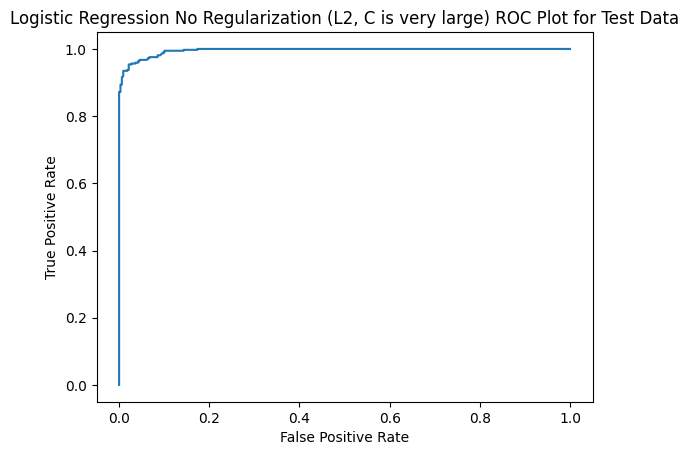

Confusion Matrix: 
[[316  12]
 [ 16 352]]
Accuracy Score: 
0.9597701149425287
Recall Score: 
0.9565217391304348
Precision Score: 
0.967032967032967
F1 Score: 
0.9617486338797814


In [15]:
from project1.utils.MetricsAnalyzer import MetricsAnalyzer

wo_reg_metrics = MetricsAnalyzer(logistic_wo_regularization, dim_reduced_test_features, test_root_labels, pos_label="sports")
wo_reg_metrics.print_all(plot_title="Logistic Regression No Regularization (L2, C is very large) ROC Plot for Test Data")

ROC plot: 


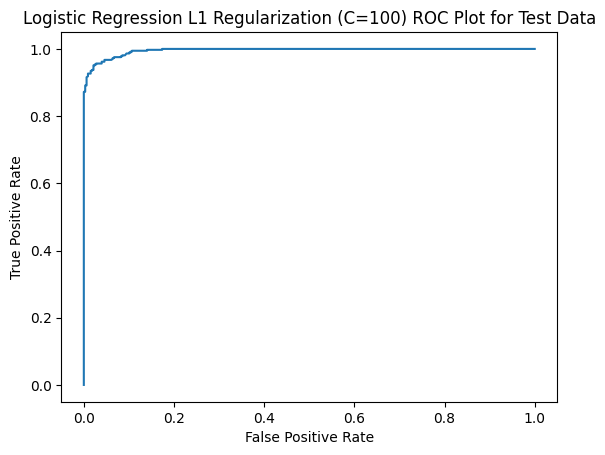

Confusion Matrix: 
[[316  12]
 [ 16 352]]
Accuracy Score: 
0.9597701149425287
Recall Score: 
0.9565217391304348
Precision Score: 
0.967032967032967
F1 Score: 
0.9617486338797814


In [18]:
l1_metrics = MetricsAnalyzer(l1_logistic, dim_reduced_test_features, test_root_labels, pos_label="sports")
l1_metrics.print_all(plot_title="Logistic Regression L1 Regularization (C=100) ROC Plot for Test Data")

ROC plot: 


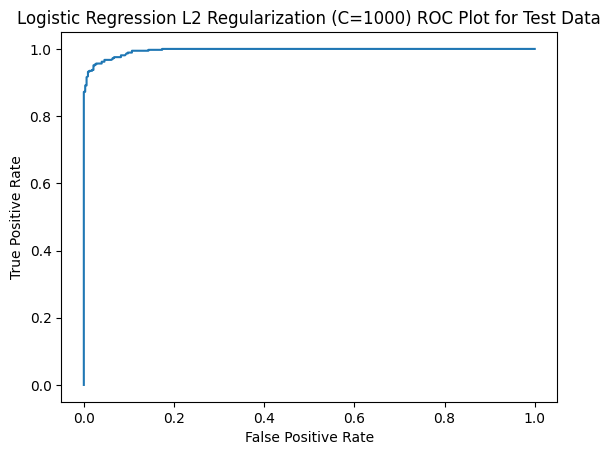

Confusion Matrix: 
[[316  12]
 [ 16 352]]
Accuracy Score: 
0.9597701149425287
Recall Score: 
0.9565217391304348
Precision Score: 
0.967032967032967
F1 Score: 
0.9617486338797814


In [17]:
l2_metrics = MetricsAnalyzer(l2_logistic, dim_reduced_test_features, test_root_labels, pos_label="sports")
l2_metrics.print_all(plot_title="Logistic Regression L2 Regularization (C=1000) ROC Plot for Test Data")